In [1]:
# ! pip install fiftyone

## Visualize images in RDD2022 for the ORDDC'2024 competition

In [2]:
import os
import fiftyone as fo
import fiftyone.zoo as foz

In [3]:
# Path of the dataset formatted in ~/images/**/*.jpg and ~/labels/**/*.txt
dataset_dir="rdd2022/coco"

In [4]:
! tree -L 2 $dataset_dir

rdd2022/coco
├── annotations
│   ├── histogram_coco4_rdd2022.json
│   ├── rdd2022_annotations.json
│   └── train.json
├── test
│   └── images
└── train
    └── images

5 directories, 3 files


#### Load the dataset, using tags to mark the samples in each split

In [5]:
import time
# Name of the dataset in session
name = "export_coco_rdd2022" + str(time.time())
# The splits to load 
splits = ["train"] # "train", "val", 

In [6]:
# The type of the dataset being imported
dataset_type = fo.types.COCODetectionDataset  # for example

# Import the dataset
dataset = fo.Dataset.from_dir(
    name = name,
    dataset_type=dataset_type,
    data_path=os.path.join(dataset_dir, splits[0], "images"),
    labels_path=os.path.join(dataset_dir, "annotations", "{}.json".format(splits[0])),
    tags=splits[0]
)

 100% |█████████████| 38385/38385 [1.5m elapsed, 0s remaining, 378.5 samples/s]      


In [7]:
print(dataset.summary())

Name:        export_coco_rdd20221721322982.4353812
Media type:  image
Num samples: 38385
Persistent:  False
Tags:        []
Sample fields:
    id:         fiftyone.core.fields.ObjectIdField
    filepath:   fiftyone.core.fields.StringField
    tags:       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    detections: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [8]:
print(dataset.stats())

{'samples_count': 38385, 'samples_bytes': 22164869, 'samples_size': '21.1MB', 'total_bytes': 22164869, 'total_size': '21.1MB'}


### Creates a session and opens the App in the output of the cell

In [10]:
session = fo.launch_app(dataset)

In [11]:
# Replace active App instance with screenshot so App state is viewable offline
session.freeze()

## Visualize Histogram


In [43]:
import os, json
import numpy as np
import matplotlib.pyplot as plt


In [71]:
def plot_hist(hist_data, dataset_name):
    val_dict = {}
    fig, ax = plt.subplots(figsize=(32, 6))
    for code, val_count in sorted(hist_data.items()):
        val_dict[code] = [val_count['Czech'], val_count['India'], val_count['Japan']]
    print(val_dict)
    w = 0.2  # the width of the bars: can also be len(x) sequence
    ind = np.arange(3)
    ax.bar(ind,   val_dict["D00"],  width=0.2, align='center')
    #ax.bar(ind+w, val_dict["D10"], width=0.2, color='g', align='center')
    #ax.bar(ind+w*2, val_dict["D20"], width=0.2, color='r', align='center')
    #ax.bar(ind+w*3, val_dict["D40"], width=0.2, color='y', align='center')

    ax.set_ylabel('Count')
    #ax.set_xticks(ind+w)
    #ax.set_xticklabels(val_dict.keys())
    ax.set_title('Histogram of annotated defect code in {} dataset'.format(dataset_name))
    plt.show()

In [72]:
def load_data(hist_file):
    with open(hist_file, 'r') as file:
        hist_data = json.load(file)
        print(hist_data.keys())
    return hist_data

dict_keys(['D10', 'D00', 'D20', 'D40'])
{'D00': [988, 1555, 4049], 'D10': [399, 68, 3979], 'D20': [161, 2021, 6199], 'D40': [197, 3187, 2243]}


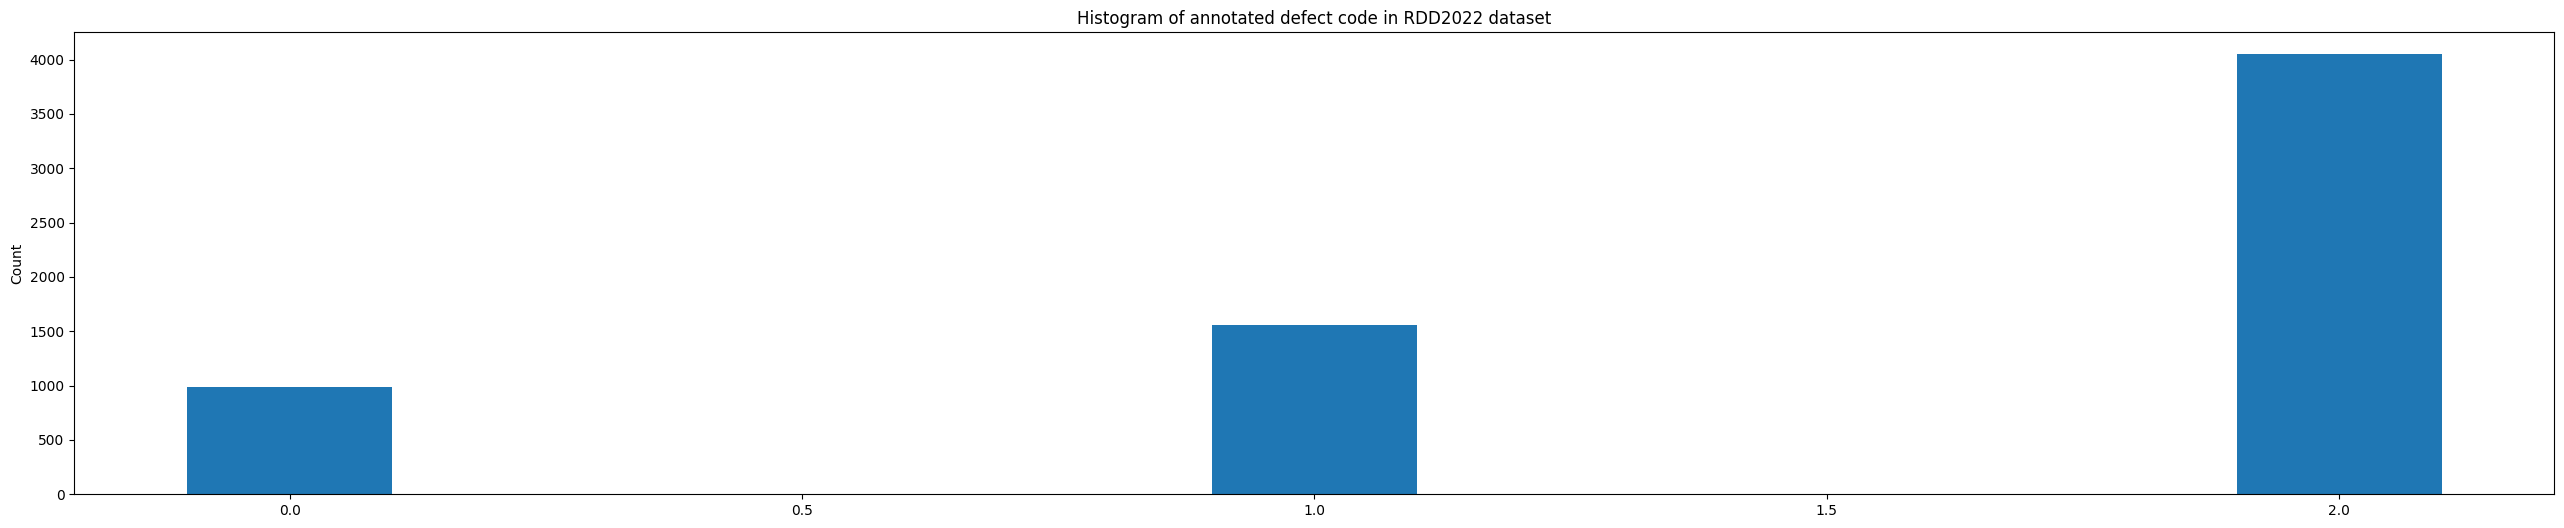

In [73]:
plot_hist(load_data(os.path.join(dataset_dir, "annotations", "histogram_coco4_rdd2022.json")), dataset_name="RDD2022")